# Proof-of-concept

### Working example of the pixel fixing programme with a simple mathematically generated image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from hub_simulation import gaussian,fit

In [2]:
x = np.linspace(-10,10,1001)
y = x.copy()

theta1 = np.pi/3
theta2 = -np.pi/6
grid = np.meshgrid(x,y)
z1 = gaussian(grid,0,0,1,theta1,45,30)
z2 = gaussian(grid,0,7,1,theta2,45,30)

data = z1+z2
data_sat = data.copy()
data_sat[data>0.9] = np.nan
sat_area = np.isnan(data_sat)
par,fixed = fit(grid,data_sat,sat_area,FWHM=np.array([[44.5,30.2],[44.5,30.2]]),peaks=2)
residues = np.abs(fixed-data)

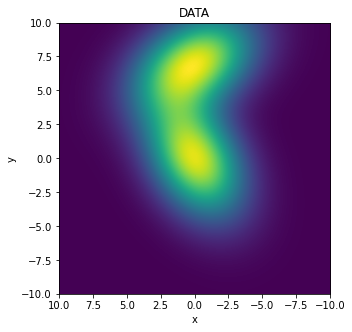

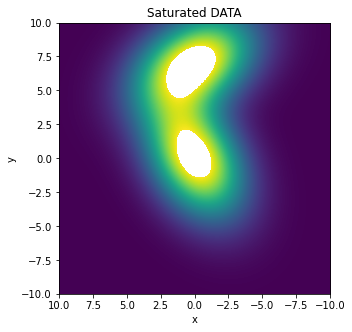

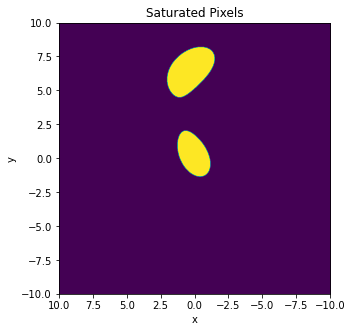

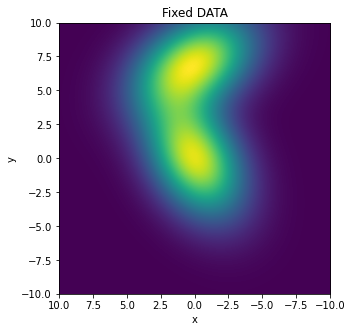

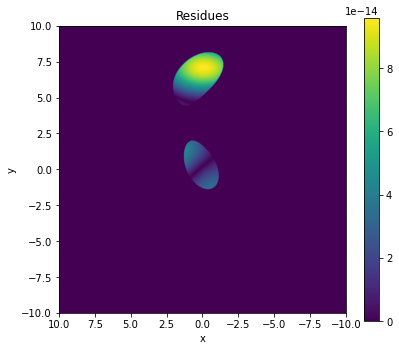

[-2.47685861e-13  4.06489224e-13  1.00000000e+00  1.04719755e+00
  4.50000000e+01  3.00000000e+01  1.98248610e-13  7.00000000e+00
  1.00000000e+00 -5.23598776e-01  4.50000000e+01  3.00000000e+01]


In [3]:
use_origin='lower'
use_extent=(x.max(),x.min(),y.min(),y.max())

plt.figure(figsize=(5,5),tight_layout=True)
plt.imshow(data,origin=use_origin,extent=use_extent)
plt.title('DATA')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../document/example_data.pdf')
plt.show()


plt.figure(figsize=(5,5),tight_layout=True)
plt.imshow(data_sat,origin=use_origin,extent=use_extent)
plt.title('Saturated DATA')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../document/example_satdata.pdf')
plt.show()

plt.figure(figsize=(5,5),tight_layout=True)
plt.imshow(sat_area,origin=use_origin,extent=use_extent)
plt.title('Saturated Pixels')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../document/example_satarea.pdf')
plt.show()

plt.figure(figsize=(5,5),tight_layout=True)
plt.imshow(fixed,origin=use_origin,extent=use_extent)
plt.title('Fixed DATA')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../document/example_fixed.pdf')
plt.show()

plt.figure(figsize=(6,5),tight_layout=True)
plt.imshow(residues,origin=use_origin,extent=use_extent)
plt.title('Residues')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.savefig('../document/example_residues.pdf')
plt.show()

print(par)